<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Logistic-Regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Import the libraries

In [61]:
# Imports the NumPy library, which is a popular numerical computing library in Python
import numpy as np

# Imports the pyplot module of the matplotlib library in Python used for data visualization
import matplotlib.pyplot as plt

# Imports the Pandas library in Python using, which provides data structures and functions for data manipulation and analysis
import pandas as pd

## Import the dataset

In [62]:
# Use read_csv() method to read the contents of the CSV file and convert it into a DataFrame object
dataset = pd.read_csv('data.csv')

# Selects all rows and the columns from the third to the last column up to the last column (excluding the last column itself)
# Select the columns: Loan Amount and Saving Account Balance
X = dataset.iloc[:, -3:-1].values

# Select the last column from the dataset
y = dataset.iloc[:, -1].values

In [63]:
# Print the first 5 elements of the matrix X
print(X[:5, -2:])

[[ 2753 17869]
 [ 4884 19137]
 [ 3338 18750]
 [ 2243 12311]
 [ 3545  1515]]


In [64]:
# Print the first 5 elements of the matrix Y
print(y[:5,])

[0 1 0 0 0]


## Splitting the dataset into the Training set and Test set

In [65]:
# Imports train_test_split function from model_selection module of the scikit-learn library
from sklearn.model_selection import train_test_split

# Splits the dataset into a training set and a testing set using train_test_split function from scikit-learn
# 80% train and 20% test
# The 'random_state' parameter is set to 0, which means that the split will be deterministic and the same split 
# will be obtained every time the code is run. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [66]:
# Imports the StandardScaler class from the scikit-learn library in Python, which is used for standardizing 
# (scaling) the features of a dataset by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Creates an instance of the StandardScaler class from scikit-learn, which can be used to scale the features 
# of a dataset to have zero mean and unit variance.
sc = StandardScaler()

# Applies fit_transform method of the StandardScaler to the training set X_train, 
# which scales the features of the dataset to have zero mean and unit variance based on the training set statistics.
X_train = sc.fit_transform(X_train)

# Applies fit_transform method of the StandardScaler to the training set X_test
X_test = sc.transform(X_test)

In [67]:
# Print the first 5 elements of the matrix X_train
print(X_train[:5, -2:])

[[-0.06331901 -0.2556675 ]
 [ 0.77817904  1.65399889]
 [ 1.05109733  0.07297844]
 [ 0.00840951 -0.40047385]
 [-1.21884804  1.48218293]]


In [68]:
# Print the first 5 elements of the matrix X_test
print(X_test[:5, -2:])

[[ 1.41936207  0.51001131]
 [-0.80159797  0.50739748]
 [ 0.71344842 -1.04034017]
 [-0.57066711 -0.60173899]
 [-1.5302548   1.46162078]]


In [69]:
# Print the first 5 elements of the matrix y_train
print(y_train[:5,])

[0 0 0 0 0]


In [70]:
# Print the first 5 elements of the matrix y_test
print(y_test[:5,])

[0 0 0 0 0]


## Training the Logistic Regression model on the Training set

In [71]:
# Imports the LogisticRegression class from the scikit-learn linear_model module, 
# which allows the user to build a logistic regression model for binary classification.
from sklearn.linear_model import LogisticRegression

# Creates an instance of the LogisticRegression class with a specified random state
classifier = LogisticRegression(random_state = 0)

# Fits the logistic regression model represented by the classifier object to the training data, 
# X_train and y_train, so that the model can learn to make predictions on new data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [72]:
# Applies the trained logistic regression classifier to predict the binary class label of a new sample 
# represented by the input features [4648, 4719] that has been standardized using the same scaling applied to the training data
print(classifier.predict(sc.transform([[4648,4719]])))

[0]


In [73]:
# Print the first 5 records with approved status
dataset[dataset['approval_status'] == 1].head().T

,1,8,18,19,41
credit_history,Good,Good,Good,Good,Good
employment_status,Unemployed,Employed,Unemployed,Self-Employed,Self-Employed
collateral,Other,Land,Investment,Other,Other
payment_history,Good,Excellent,Fair,Good,Good
type_of_credit_accounts,Student,Mortgage,Other,Auto,Student
public_records_and_collections,Tax Lien,None,Other,Bankruptcy,None
purpose_of_loan,Car Financing,Car Financing,Debt Consolidation,Car Financing,Car Financing
income,13895,27152,13241,12750,22890
assets_value,35043,41804,26697,49915,28727
debt_to_income_ratio,77,36,63,37,28


In [74]:
# Test Record No.5
print(classifier.predict(sc.transform([[2466,5303]])))

[0]


In [75]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_train_encoded = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
y_train_scaled = sc.fit_transform(y_train_encoded)

# print the first 10 original and scaled data
print("Original data y_train:\n", y_train[:10,])
print("Scaled data y_train..:\n", y_train_scaled[:10,])

Original data y_train:
 [0 0 0 0 0 0 0 0 0 0]
Scaled data y_train..:
 [[ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]
 [ 0.34023538 -0.34023538]]


In [76]:
# Applies the trained logistic regression classifier to predict the binary class labels of the test set X_test, 
# and stores the predicted labels in the y_pred variable.
y_pred = classifier.predict(X_test)

# Concatenates the predicted and actual binary class labels for the test set into a single two-dimensional NumPy array, 
# and then prints the resulting array to the console.
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

## Making the Confusion Matrix

In [77]:
# Imports the confusion_matrix function from the scikit-learn metrics module, 
# which can be used to compute the confusion matrix of a classifier's predictions.
from sklearn.metrics import confusion_matrix

# Applies the confusion_matrix function to compute the confusion matrix of a classifier's predictions 
# by comparing the predicted binary class labels (y_pred) to the actual binary class labels (y_test) for the test set.
cm = confusion_matrix(y_test, y_pred)

# Prints the confusion matrix
print(cm)

[[178   0]
 [ 22   0]]


In [78]:
# Imports the accuracy_score function from the scikit-learn metrics module, 
# which can be used to compute the accuracy of a classifier's predictions by comparing 
# the predicted binary class labels to the actual binary class labels for a set of data.
from sklearn.metrics import accuracy_score

# Applies the accuracy_score function to compute the accuracy of a classifier's predictions 
# by comparing the predicted binary class labels (y_pred) to the actual binary class labels (y_test) for the test set.
accuracy_score(y_test, y_pred)

0.89

## Visualising the Training set results

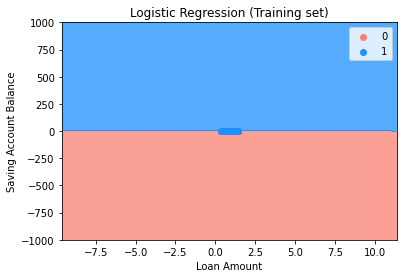

In [82]:
# Imports the ListedColormap class from the matplotlib.colors module, 
# which can be used to create a colormap for visualizing data in a plot.
from matplotlib.colors import ListedColormap

# Applies the inverse_transform method of the StandardScaler object "sc" to the feature data "X_train" 
# to convert the standardized feature data back to the original scale, and assigns the resulting feature 
# data and the target data "y_train" to the variables "X_set" and "y_set", respectively.
X_set, y_set = sc.inverse_transform(X_train), y_train

# Creates a mesh grid of coordinates for the two-dimensional feature space defined by the two columns of the "X_set" array, 
# with the specified start, stop, and step sizes for each dimension.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

#
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Loan Amount')
plt.ylabel('Saving Account Balance')
plt.legend()
plt.show()